In [1]:
import numpy
import matplotlib.pyplot as plt
import linreg

In [2]:
# number of data points
n_points = 10

# maximum degree 
max_degree = 7

In [3]:
# set a seed here to initialize the random number generator
# (such that we get the same dataset each time this cell is executed)
numpy.random.seed(1)

# let's generate some "non-linear" data; note
# that the sorting step is done for visualization
# purposes only (to plot the models as connected lines)
X = numpy.random.uniform(-10,10, n_points)
t = X**2 + numpy.random.random(n_points) * 25

# reshape both arrays to make sure that we deal with
# N-dimensional Numpy arrays
t = t.reshape((len(t), 1))
X = X.reshape((len(X),1))
print("Shape of our data matrix: %s" % str(X.shape))
print("Shape of our target vector: %s" % str(t.shape))

Shape of our data matrix: (10, 1)
Shape of our target vector: (10, 1)


In [4]:
def augment(X, max_order):
    """ Augments a given data
    matrix by adding additional 
    columns.
    
    NOTE: In case max_order is very large, 
    numerical inaccuracies might occur
    """
    
    X_augmented = X
    
    for i in range(2, max_order+1):
        print("Augmented with order %i ..." % i)
        X_augmented = numpy.concatenate([X_augmented, X**i], axis=1)
        
    return X_augmented

Xnew = augment(X, max_degree)


Augmented with order 2 ...
Augmented with order 3 ...
Augmented with order 4 ...
Augmented with order 5 ...
Augmented with order 6 ...
Augmented with order 7 ...


In [5]:
# fit linear regression model using the augmented data matrix
# try the following values: lam=0.0, lam=10**2, lam=10**5, lam=10**10, lam=10**15
model = linreg.LinearRegression(lam=0.0)
model.fit(Xnew,t)
preds = model.predict(Xnew)


Augmented with order 2 ...
Augmented with order 3 ...
Augmented with order 4 ...
Augmented with order 5 ...
Augmented with order 6 ...
Augmented with order 7 ...


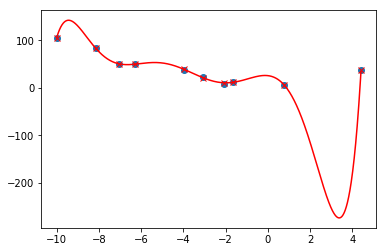

In [6]:
# same plot as before but with some more points
# for plotting the model ...
Xplot = numpy.arange(X.min(), X.max(), 0.01)
Xplot = Xplot.reshape((len(Xplot), 1))
Xplot = augment(Xplot, max_degree)
preds_plot = model.predict(Xplot)

plt.plot(Xnew[:,0], t, 'o')
plt.plot(Xnew[:,0], preds, 'x', color='red')
plt.plot(Xplot[:,0], preds_plot, '-', color='red')

plt.show()